<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2023-2/blob/main/ML_day3/3_2_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref: https://github.com/rickiepark/handson-ml2

#  Decision Tree

In [47]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 훈련과 시각화

In [48]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42) #설정하지 않았으면 gini(Gini impurity)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

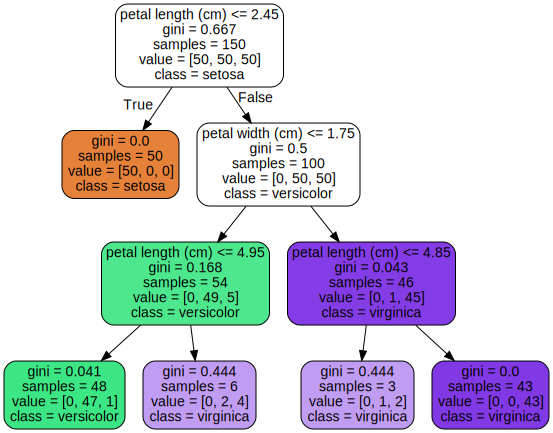

In [49]:
from graphviz import Source
from sklearn.tree import export_graphviz #시각화 툴 (아래 tree를 보기 쉽게 그려줌)

graph = export_graphviz(
        tree_clf,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
        )

Source(graph) ##fetal length와 width만을 가지고 분류

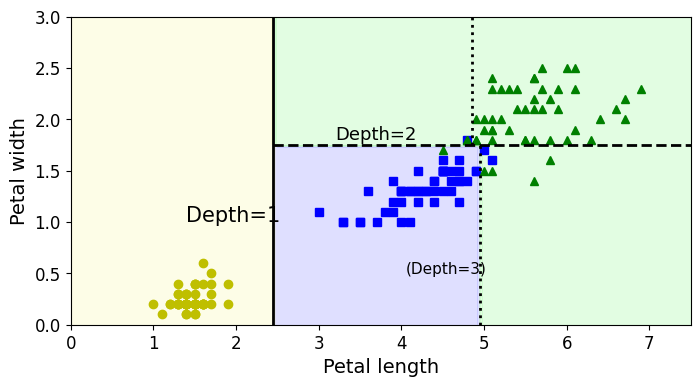

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape) #predict 함수를 사용해서 y_prediction 값을 얻음

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y) ## decision boundary 그려줌 (위의 plot_decision_boundary 함수 활용)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=1", fontsize=15)
plt.text(3.2, 1.80, "Depth=2", fontsize=13)
plt.text(4.05, 0.5, "(Depth=3)", fontsize=11)

plt.show()

# 클래스와 클래스 확률을 예측하기

In [52]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [53]:
tree_clf.predict([[5, 1.5]])

array([2])

# 회귀 트리

In [54]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

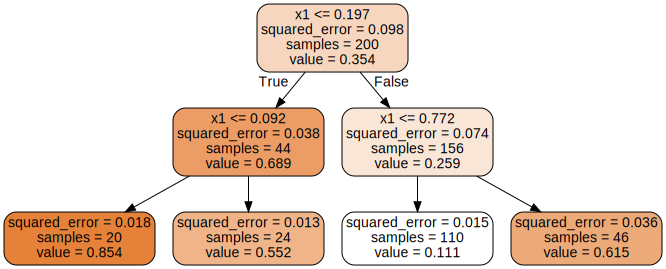

In [56]:
graph = export_graphviz(
        tree_reg1,
        feature_names=["x1"],
        rounded=True,
        filled=True
        )
Source(graph)

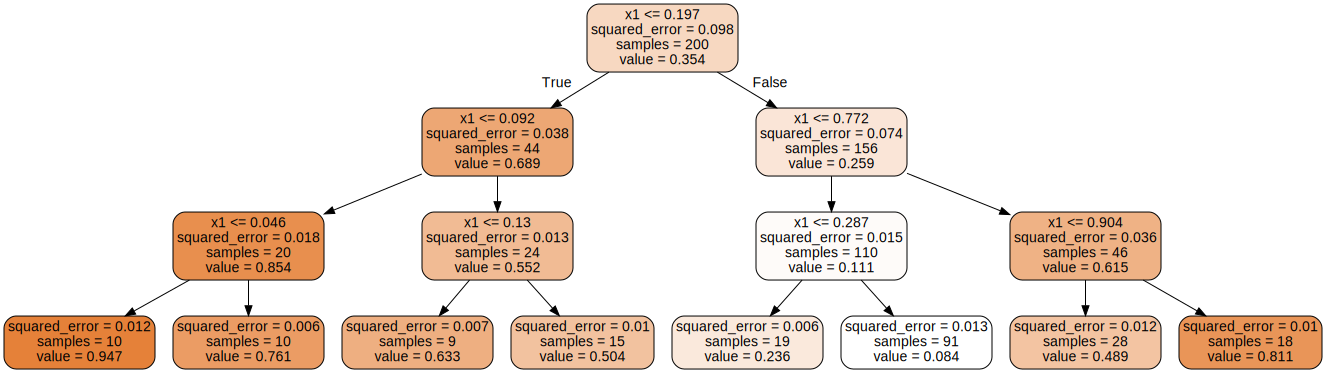

In [58]:
graph = export_graphviz(
        tree_reg2,
        feature_names=["x1"],
        rounded=True,
        filled=True
        )
Source(graph)

# Ensemble

In [59]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

import time

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, #The number of base estimators in the ensemble.
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) #bagging이 decision tree보다 test 성능이 좋다는 것을 볼 수 있다!

0.904


In [63]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree)) #decision tree의 성능은 85%

0.856


In [64]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

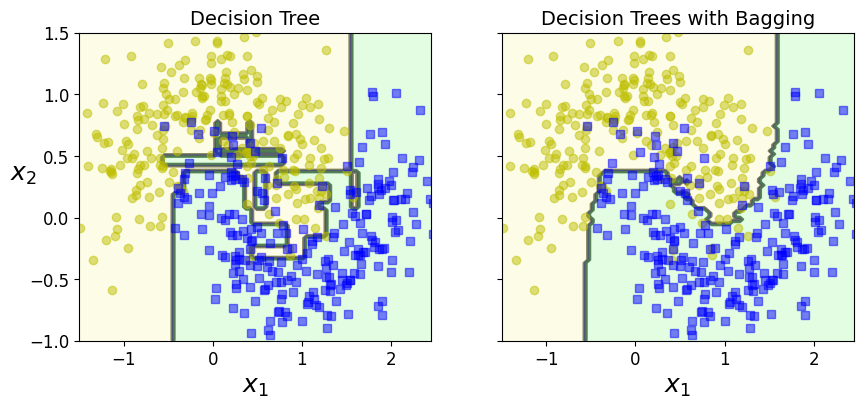

In [65]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True) #bagging이 decision bound가 좀 더 smooth함
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

# Random Forest

In [66]:
start = time.time()

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

bag_clf.fit(X_train, y_train)
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

y_pred = bag_clf.predict(X_test)
print(y_pred)

time : 1.5149154663085938
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]


In [67]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,max_features=2)
rnd_clf.fit(X_train, y_train)
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

y_pred_rf = rnd_clf.predict(X_test)
print(y_pred_rf)
print(accuracy_score(y_test, y_pred_rf))

time : 0.9051930904388428
[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
0.912


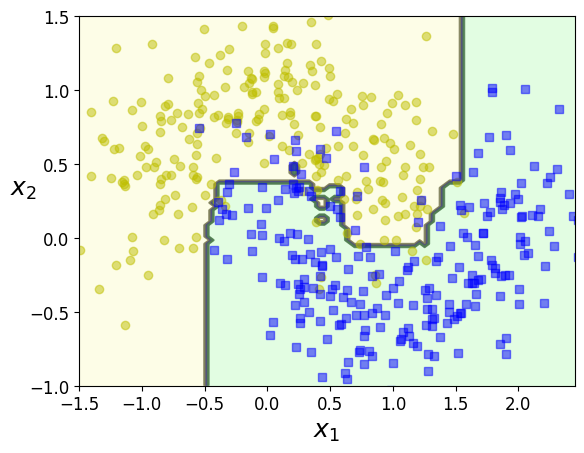

In [68]:
plot_decision_boundary(rnd_clf, X, y)


In [69]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  #거의 예측이 동일합니다.


1.0

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


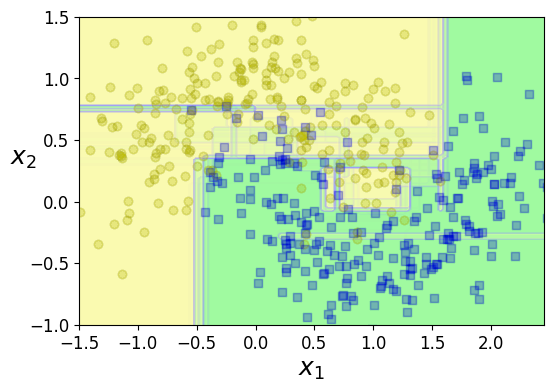

In [71]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

# AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

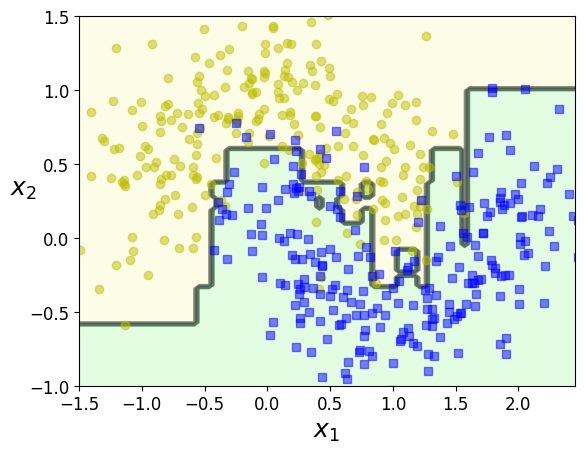

In [73]:
plot_decision_boundary(ada_clf, X, y)


# Exercise

In [ ]:
import pandas as pd
titanic = pd.read_csv('https://web.stanford.edu/class/archive' \
                      '/cs/cs109/cs109.1166/stuff/titanic.csv')
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
# drop string value
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Sex', axis=1, inplace=True)

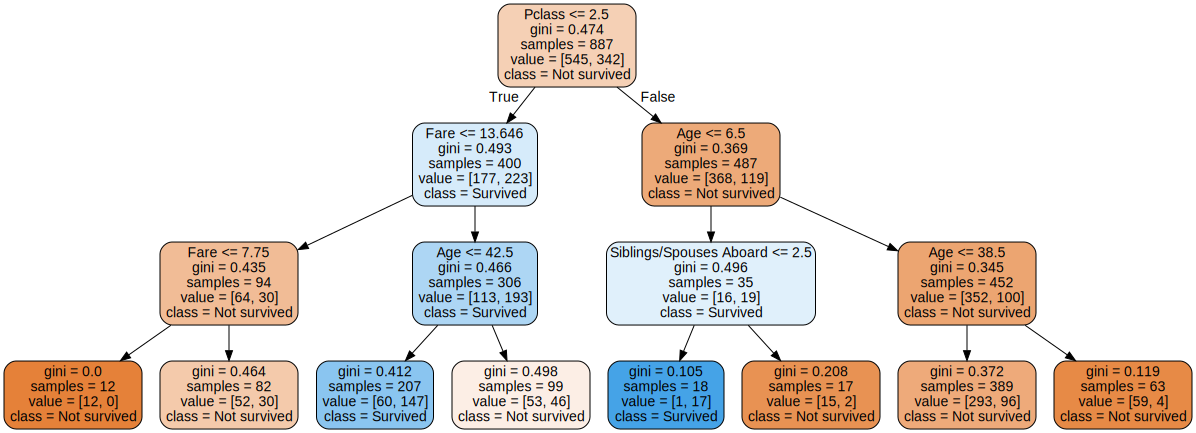

In [ ]:
from sklearn import tree
from graphviz import Source

# To-do
# Survived를 y에 저장, Survived를 제외한 나머지 column들을 X로 사용
# Decision Tree Classifier 학습 : model에 저장


graph = Source(tree.export_graphviz(model, out_file=None,
                                    feature_names=titanic.columns[1:],
                                    class_names=['Not survived', 'Survived'],
                                    filled=True, rounded=True))
graph